# Classification Seminar 1

The purpose of this seminar work is to visualize interesting relationships withing the data set and build at least two different ML-models that predicts whether a person has a high risk of suffering a heart attack or not.

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

csv_path = 'Heart_Attack_Classification.csv'
df = pd.read_csv(csv_path, sep=';', quotechar='"')
df.head(3)

,Age,Sex,Chest pain,Blood pressure,Cholestoral,Diabetes,Max heart rate,Exercice induced angina,Number of vessels,Other observations,Risk of heart attack
0,59,Female,Asymptomatic,140,177,No,162,Yes,1,Reversible vessel defect,No
1,60,Female,Asymptomatic,125,258,No,141,Yes,1,Reversible vessel defect,No
2,64,Female,Asymptomatic,128,263,No,105,Yes,1,Reversible vessel defect,Yes


In [77]:
df.describe()

,Age,Blood pressure,Cholestoral,Max heart rate,Number of vessels
count,300.000000,300.000000,300.00000,300.000000,300.000000
mean,54.363333,131.560000,246.34000,149.560000,0.730000
std,9.111241,17.448627,51.96073,22.970384,1.023356
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,47.750000,120.000000,211.00000,133.000000,0.000000
50%,55.000000,130.000000,240.50000,152.500000,0.000000
75%,61.000000,140.000000,274.25000,166.000000,1.000000
max,77.000000,200.000000,564.00000,202.000000,4.000000


In [78]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain                 0
Blood pressure             0
Cholestoral                0
Diabetes                   0
Max heart rate             0
Exercice induced angina    0
Number of vessels          0
Other observations         0
Risk of heart attack       0
dtype: int64

## Plottings

### Histograms
These plots can help us understand the distribution of numeric variables in relation to the target variable. We can create separate histograms for each feature, grouped by the target variable (e.g., heart attack vs. no heart attack).

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

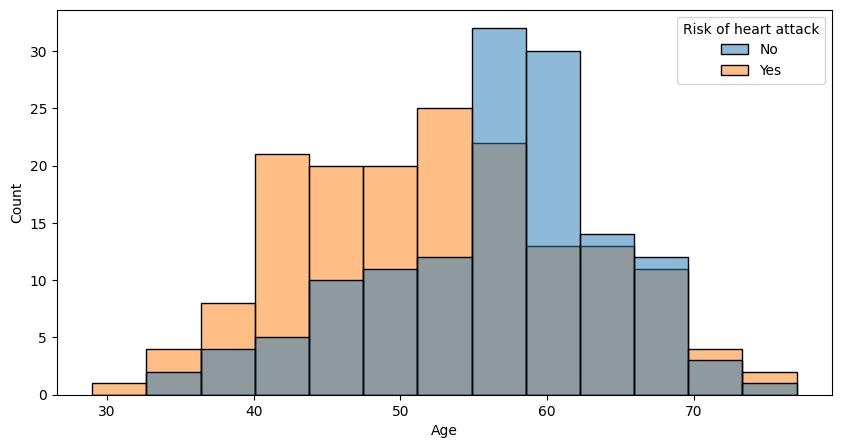

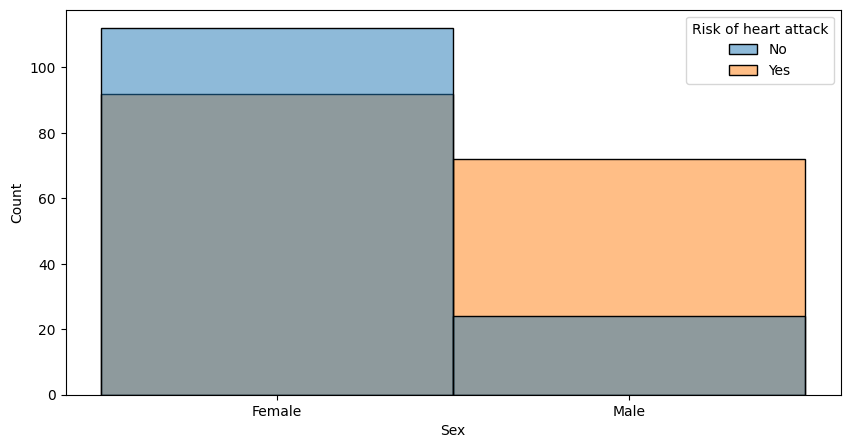

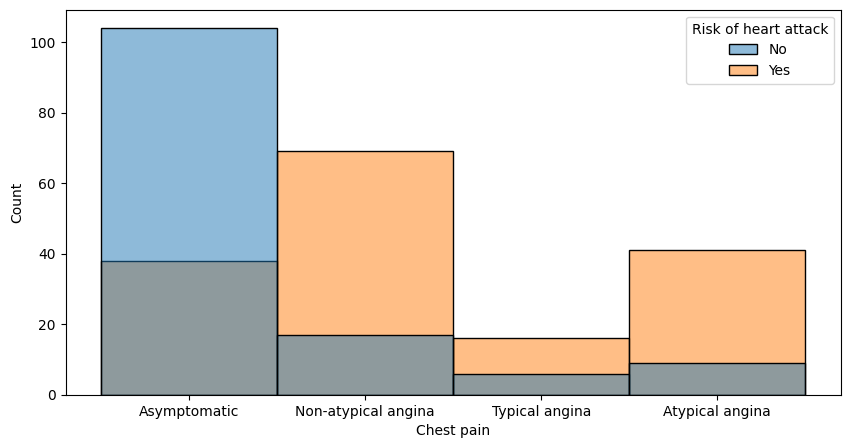

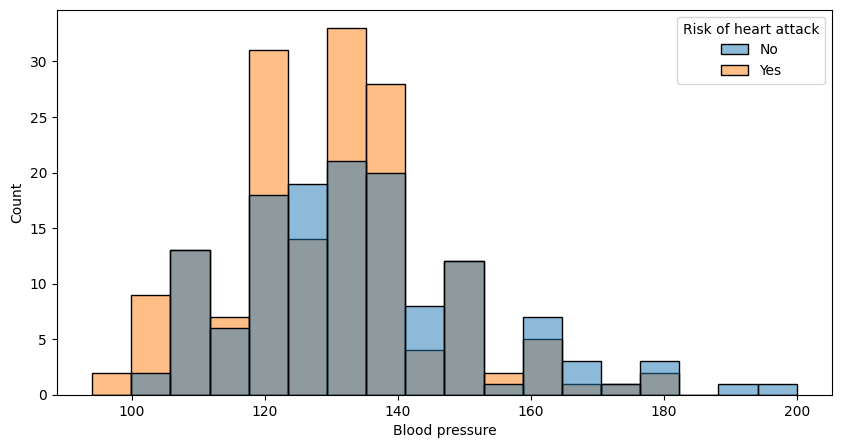

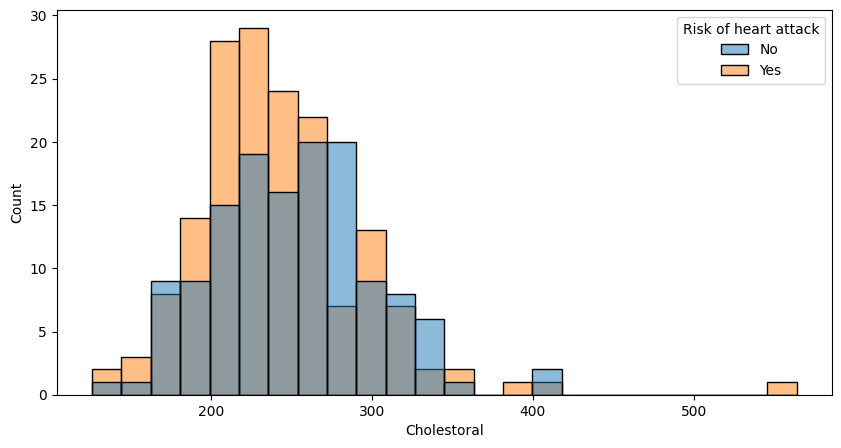

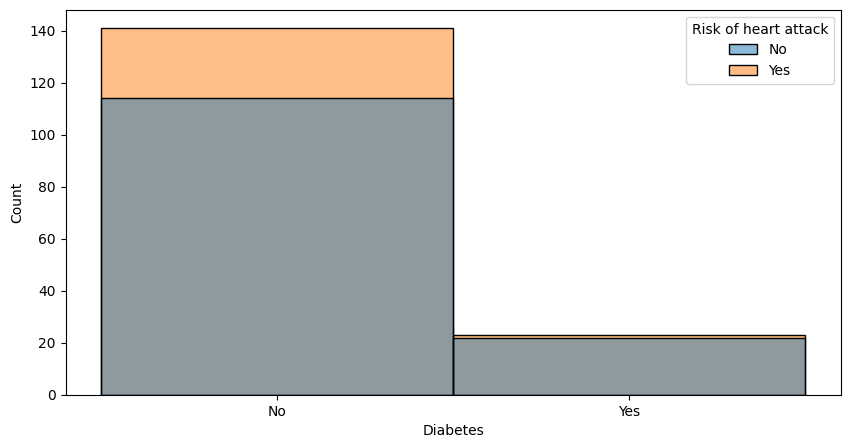

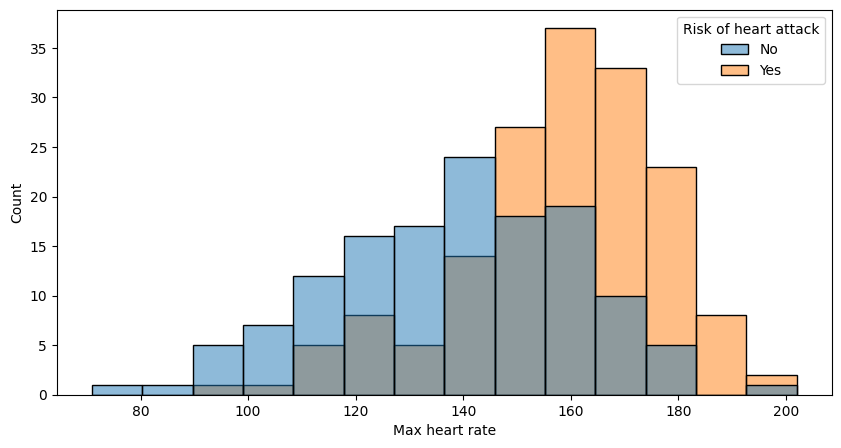

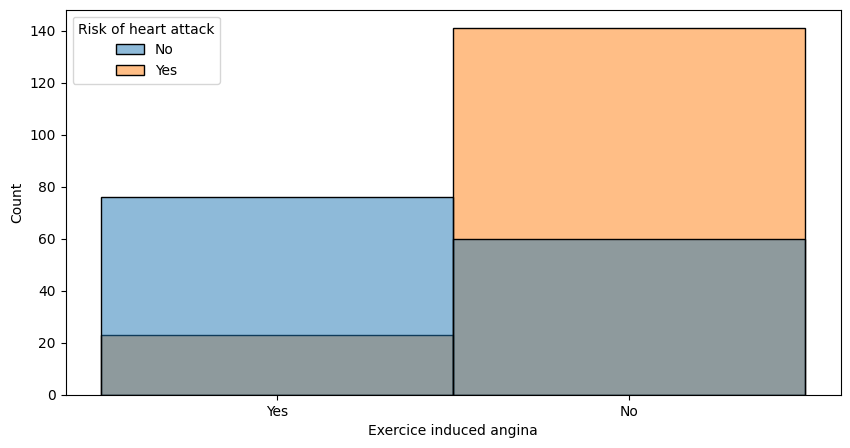

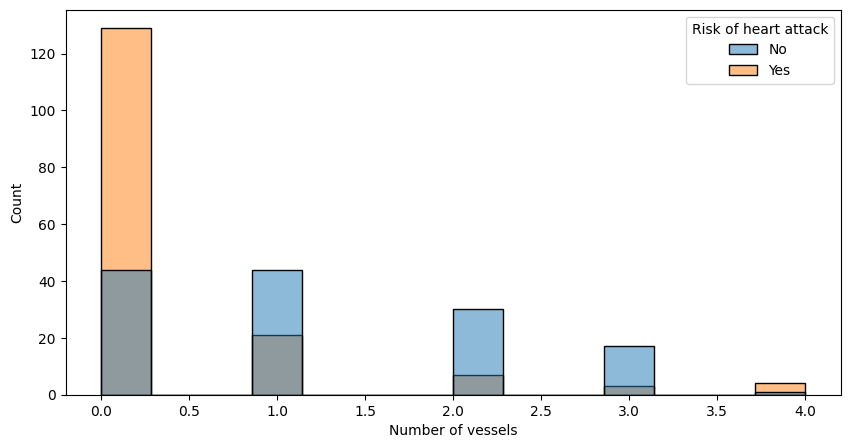

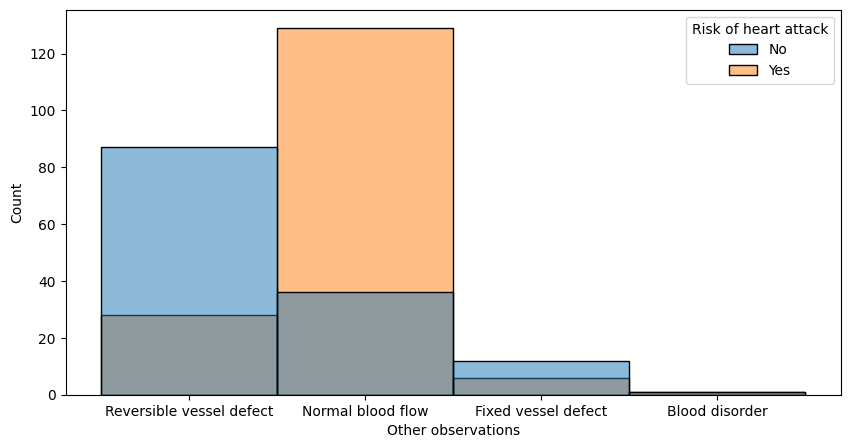

In [79]:
# Get histograms of all columns compared to the risk of heart attack
for col in df.columns:
    if col != 'Risk of heart attack':
        # Make this all fit on one page
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df, x=col, hue='Risk of heart attack')


## Data Preprocessing

In [80]:
# Risk of heart attack is the target variable
X = df.drop('Risk of heart attack', axis=1)
y = df['Risk of heart attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

# Make a copy of the original data to make changes on
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()


Visualize the variability of variables in the features present in the data i.e how dispersed the data are from each other in that particular variable.

In [81]:
unique = X_train.nunique(axis=0)
unique

Age                         39
Sex                          2
Chest pain                   4
Blood pressure              43
Cholestoral                127
Diabetes                     2
Max heart rate              87
Exercice induced angina      2
Number of vessels            5
Other observations           4
dtype: int64

In [82]:
variability = pd.DataFrame(unique).sort_values(by=0, ascending=False)
variability

,0
Cholestoral,127
Max heart rate,87
Blood pressure,43
Age,39
Number of vessels,5
Chest pain,4
Other observations,4
Sex,2
Diabetes,2
Exercice induced angina,2


As we can see from the chart above, cholesterol and max heart rate have the highest variability.

We’ll separate the data into Categoricaland numerical data so as to fill them using different filling methods.

In [83]:
# Handle missing values for object types
X_train_object = X_train_copy.select_dtypes(include=['object'])
X_test_object = X_test_copy.select_dtypes(include=['object'])

The NaNs present in the object columns will be replaced with the mode of the column respectively

In [84]:
for i in X_train_object.columns:
    mode_value = X_train_object[i].mode()[0]
    X_train_copy[i].fillna(mode_value, inplace=True)
    X_test_copy[i].fillna(mode_value, inplace=True)


The numeric dataset with NaN values will be filled with the median

In [85]:
# Handle missing values for numerical types
X_train_value = X_train_copy.select_dtypes(exclude=['object'])
X_test_value = X_test_copy.select_dtypes(exclude=['object'])

for i in X_train_value.columns:
    median_value = X_train_copy[i].median()
    X_train_copy[i].fillna(median_value, inplace=True)
    X_test_copy[i].fillna(median_value, inplace=True)

Encode categorical values with appropriate labels using Label Encoder

In [86]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

X_train_object = X_train_copy.select_dtypes(include=['object'])

for i in X_train_object.columns:
    lb.fit(X_train_copy[i])
    X_train_copy[i] = lb.transform(X_train_copy[i])
    X_test_copy[i] = lb.transform(X_test_copy[i])
    

Make sure data that is absent in the training set does not exist in the test set by checking for any columns in X_test_copy that are not in X_train_copy and drop them

In [87]:
for col in X_test_copy.columns:
    if col not in X_train_copy.columns:
        X_test_copy.drop([col], inplace=True, axis=1)

Use the Z-score to identify and remove outliers from the dataset

In [88]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(X_train_copy))
filtered_entries = (z_scores < 3).all(axis=1)

X_train_copy = X_train_copy[filtered_entries]
y_train = y_train[filtered_entries]


Fit data to two different scalers which we will use for achieving the best AUC score

In [89]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Using StandardScaler
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train_copy)
X_test_std = scaler_std.fit_transform(X_test_copy)

# Using MinMaxScaler
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train_copy)
X_test_minmax = scaler_minmax.fit_transform(X_test_copy)

## Visualization

### Correlation Matrix

The correlation matrix shows the correlation between each pair of variables in the dataset. The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

[0.08983243 0.05703507 0.14588726 0.0894696  0.08980209 0.02749709
 0.13078357 0.08613097 0.15137356 0.13218836]


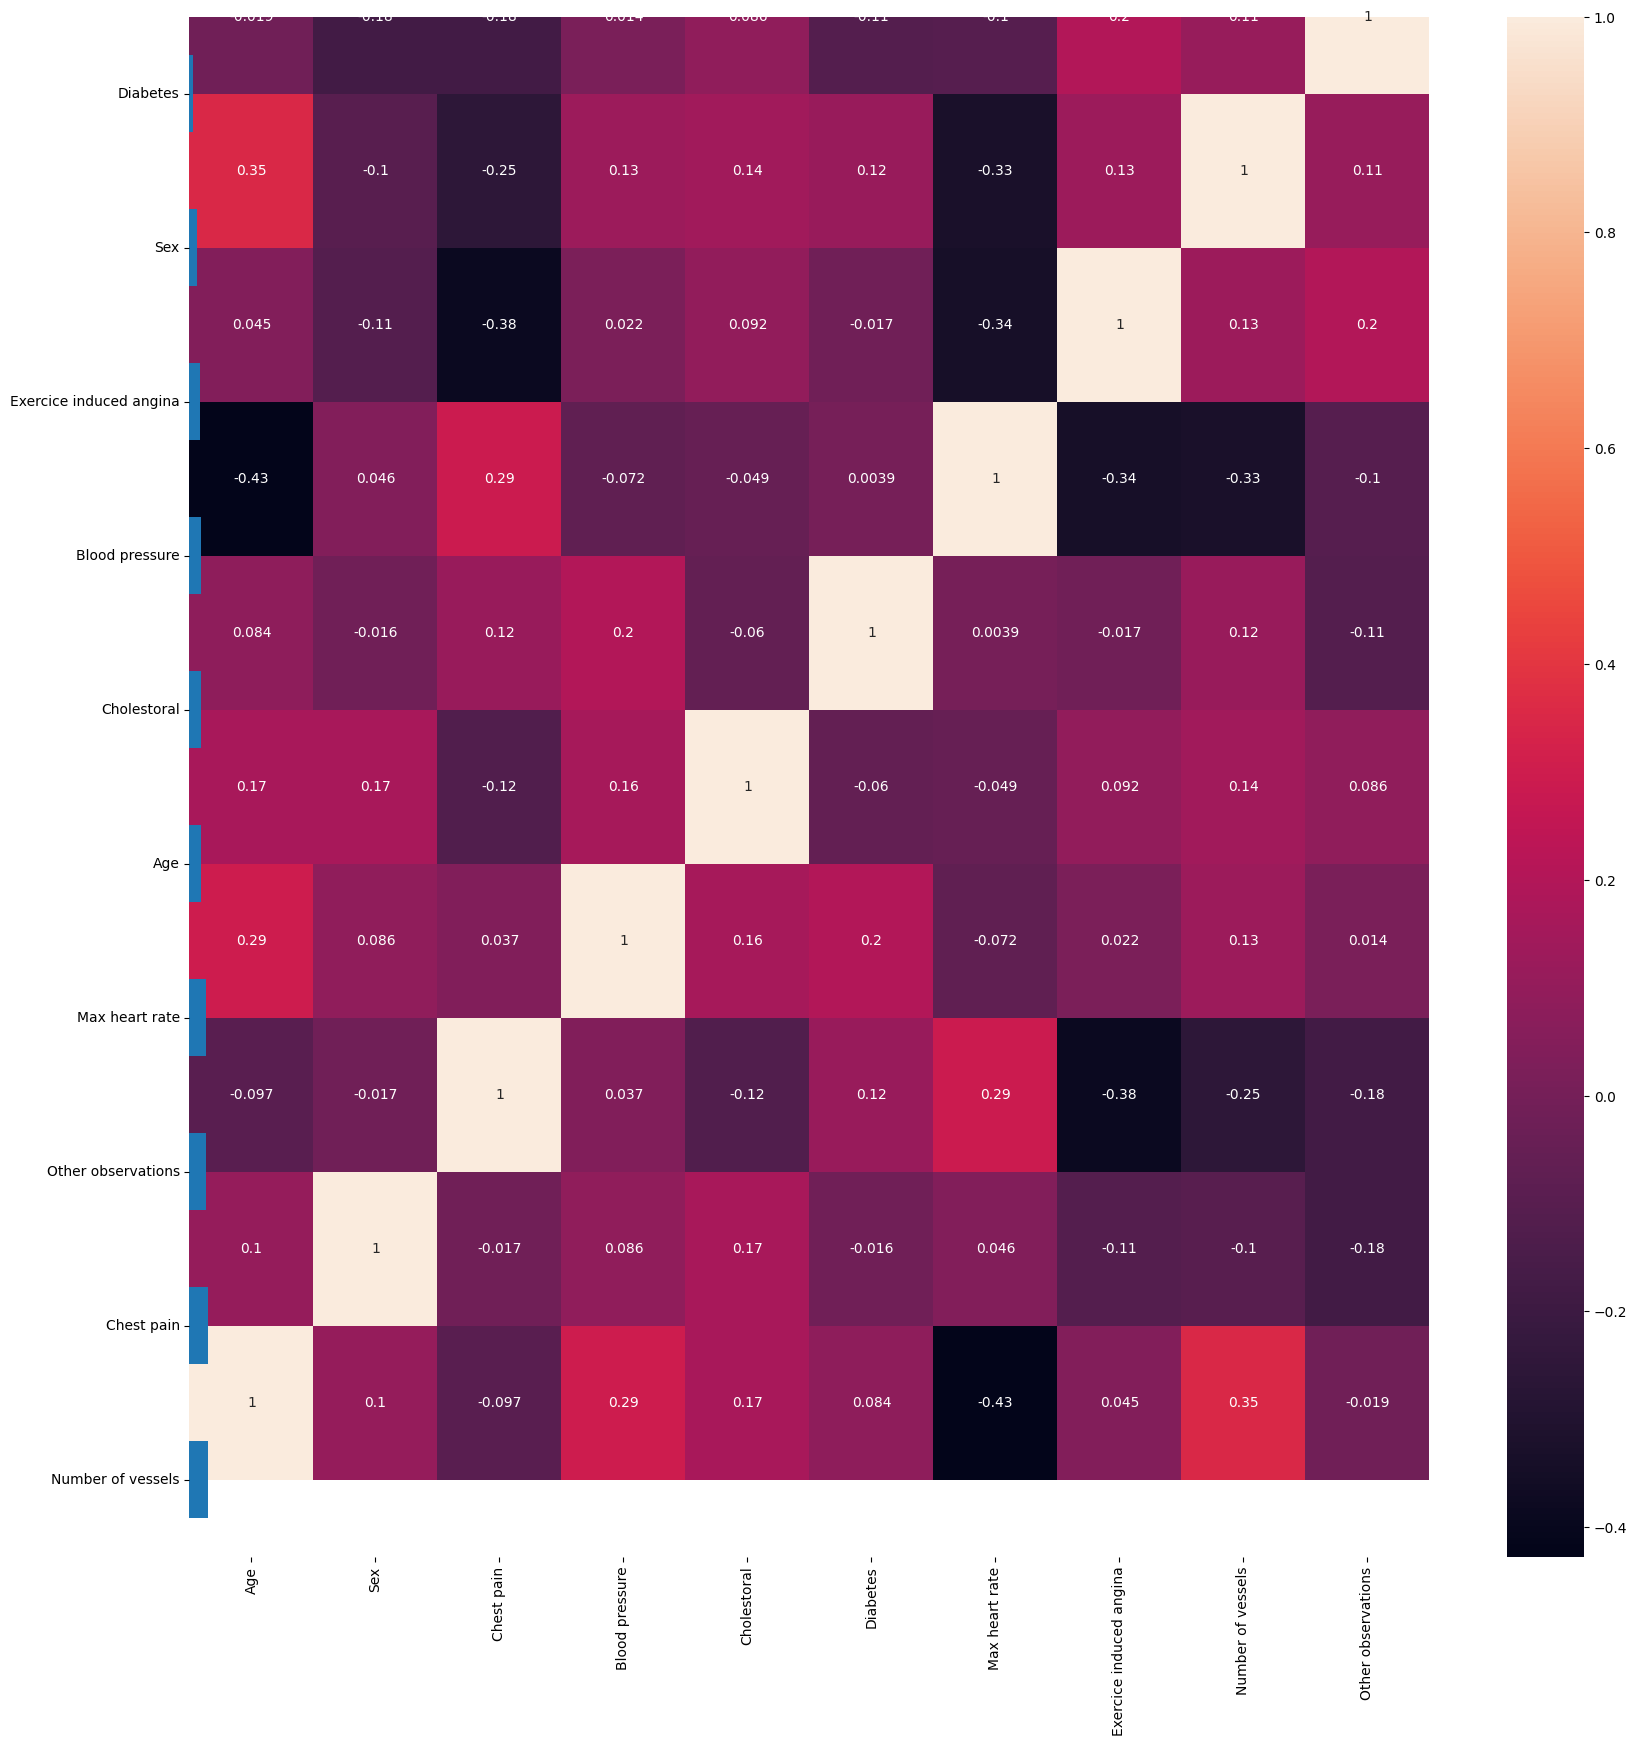

In [90]:
corrmat = X_train_copy.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20, 20))
g = sns.heatmap(X_train_copy[top_corr_features].corr(), annot=True)

# Feature importance
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X_train_copy, y_train)
print(f"{model.feature_importances_}")
feat_importances = pd.Series(model.feature_importances_, index=X_train_copy.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Using MinMaxScaler

Fitting using Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Lr = LogisticRegression(max_iter=1000)
Lr.fit(X_train_minmax, y_train)

y_pred = Lr.predict_proba(X_test_minmax)[:,1]
prediction_score = roc_auc_score(y_test, y_pred)
print (f'Logistic regression prediction score for MinMaxScaler: {prediction_score}')

Logistic regression prediction score for MinMaxScaler: 0.9160021265284424


Fitting using Gradient Boosting

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_minmax, y_train)

y_pred = gb.predict_proba(X_test_minmax)[:,1]
prediction_score=roc_auc_score(y_test, y_pred)

print (f'Gradient Boosting prediction score: {prediction_score}')

Gradient Boosting prediction score: 0.8649654439128123


Fitting using Random Forest classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_minmax, y_train)

y_pred = rf.predict_proba(X_test_minmax)[:,1]
prediction_score = roc_auc_score(y_test, y_pred)

print (f'Random Forest prediction score: {prediction_score}')

Random Forest prediction score: 0.906166932482722


Fitting using SVM classifier

In [94]:
from sklearn import svm

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train_minmax, y_train)

y_pred = svm.predict_proba(X_test_minmax)[:,1]
prediction_score = roc_auc_score(y_test, y_pred)

print (f'SVM prediction score: {prediction_score}')

SVM prediction score: 0.8947368421052632


## Using StandardScaler

Fitting using Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

Lr = LogisticRegression(max_iter=1000)
Lr.fit(X_train_std, y_train)

y_pred = Lr.predict_proba(X_test_std)[:,1]
prediction_score = roc_auc_score(y_test, y_pred)
print (f'Logistic regression prediction score for StandardScaler: {prediction_score}')

Logistic regression prediction score for StandardScaler: 0.898989898989899


Fitting using Gradient Boosting

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train_std, y_train)

y_pred = gb.predict_proba(X_test_std)[:,1]
prediction_score=roc_auc_score(y_test, y_pred)

print (f'Gradient Boosting prediction score: {prediction_score}')

Gradient Boosting prediction score: 0.8841041998936735


Fitting using Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_std, y_train)

y_pred = rf.predict_proba(X_test_std)[:,1]
prediction_score = roc_auc_score(y_test, y_pred)

print (f'Random Forest prediction score: {prediction_score}')

Random Forest prediction score: 0.9149388623072834


Fitting using SVM

In [98]:
from sklearn import svm
from sklearn.metrics import classification_report

svm = svm.SVC(kernel='linear', probability=True)
svm.fit(X_train_std, y_train)

y_pred = svm.predict_proba(X_test_std)[:,1]
prediction_score = roc_auc_score(y_test, y_pred)

print (f'SVM prediction score: {prediction_score}')

SVM prediction score: 0.8926103136629452
